# Working with MEG dataset
MEG dataset from THINGS initiative: https://openneuro.org/datasets/ds004212/versions/2.0.1
### Training data partition
The data is .fif file which needs to be converted into a rather easy to use .npy array.
We will use mne library for this: https://mne.tools/dev/index.html 


We collected extensively sampled object representations using magnetoencephalography (MEG). To this end, we drew on the THINGS database (Hebart et al., 2019), a richly-annotated database of 1,854 object concepts representative of the American English language which contains 26,107 manually-curated naturalistic object images.

ERP = event-related potential; signal with respect to some event
VEP = ERP for visual stimuli



27084 events, 281 time points, 271 channels

## Here we perform clustering experiements

In [ ]:
import numpy as np
import mne, os
import matplotlib.pyplot as plt
import pandas as pd
# from tqdm import tqdm
import matplotlib.image as mpimg
# import nimfa
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [24]:
channel_picks = ['O','T','P'] 
preproc_dir = '../data/preprocessed'
image_dir = '../data/'

n_participants = 3
def load_epochs(preproc_dir,all_epochs = []):
    for p in range(1,n_participants+1):
        epochs = mne.read_epochs(f'{preproc_dir}/preprocessed_P{str(p)}-epo.fif', preload=False)
        all_epochs.append(epochs)
    return all_epochs

def plot_erfs(epochs,n_sessions,name):
    ctf_layout = mne.find_layout(epochs.info)
    picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
    picks = np.where([i[2]==name for i in ctf_layout.names])[0]

    # get evoked data
    for s in range(n_sessions):    
        evoked = epochs[(epochs.metadata['trial_type']=='test') & (epochs.metadata['session_nr']==s+1)].average()
        evoked.pick_channels(ch_names=picks_epochs)
        plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=0.5,alpha=0.4)
    evoked = epochs[(epochs.metadata['trial_type']=='test')].average()
    evoked.pick_channels(ch_names=picks_epochs)

    # plot ERFs for selected sensor group
    plt.plot(epochs.times*1000,np.mean(evoked.data.T,axis=1),lw=1)
    plt.xlim([epochs.times[0]*1000,epochs.times[len(epochs.times)-1]*1000])
    plt.ylim([-0.6,0.6])
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (uV)')  
    # plt.['right'].set_visible(False)
    # plt.spines['top'].set_visible(False)

    #  plot sensor locations
    # ax2.plot(ctf_layout.pos[:,0],ctf_layout.pos[:,1],color='gainsboro',marker='.',linestyle='',markersize=5)
    # ax2.plot(ctf_layout.pos[picks,0],ctf_layout.pos[picks,1],color='grey',marker='.',linestyle='',markersize=5)
    # ax2.set_aspect('equal')


In [25]:
all_epochs = load_epochs(preproc_dir)

Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-1.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-2.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms
        0 CTF compensation matrices available
Reading /home/asuryawanshi/Documents/Neural-Representations-using-Things-Database/notebooks/../data/preprocessed/preprocessed_P1-epo-3.fif ...
    Found the data of interest:
        t =    -100.00 ...    1300.00 ms


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

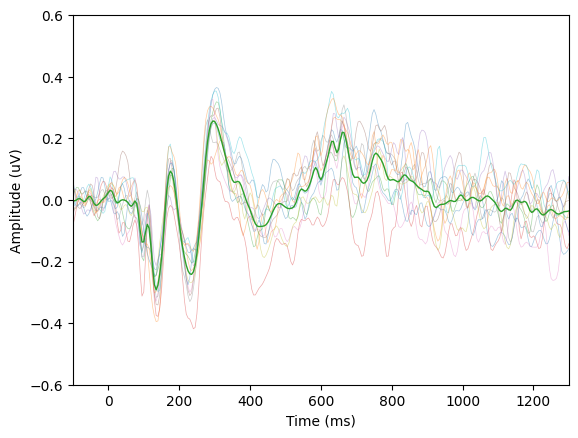

In [26]:
n_sessions = 12
plot_erfs(all_epochs[1],n_sessions,'O')

In [27]:
epochs = all_epochs[2]

In [28]:
epochs.metadata

,trial_type,image_nr,category_nr,exemplar_nr,test_image_nr,things_category_nr,things_image_nr,things_exemplar_nr,image_path,onset,image_on,image_off,responded,key_id,key_time,RT,session_nr,run_nr
0,exp,66,6,6,NaN,6.0,77.0,6.0,images_meg/air_mattress/air_mattress_06s.jpg,3.00,3.007379,3.507551,0,NaN,NaN,NaN,1,1
1,exp,19722,1644,6,NaN,1644.0,23212.0,6.0,images_meg/tent/tent_06s.jpg,4.60,4.608000,5.108164,0,NaN,NaN,NaN,1,1
2,exp,9990,833,6,NaN,833.0,11909.0,6.0,images_meg/iron/iron_06s.jpg,5.90,6.158647,6.658820,0,NaN,NaN,NaN,1,1
3,exp,18114,1510,6,NaN,1510.0,21355.0,6.0,images_meg/speaker/speaker_06s.jpg,7.55,7.559094,8.059242,0,NaN,NaN,NaN,1,1
4,exp,21630,1803,6,NaN,1803.0,25403.0,6.0,images_meg/weed/weed_06s.jpg,9.05,9.109738,9.609925,0,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27043,test,22509,874,13,61.0,874.0,12520.0,14.0,images_test_meg/kimono_14s.jpg,333.25,333.271450,333.771659,0,NaN,NaN,NaN,12,10
27044,exp,1928,161,8,NaN,161.0,2461.0,8.0,images_meg/bomb/bomb_08s.jpg,334.60,334.821982,335.322292,0,NaN,NaN,NaN,12,10
27045,exp,12380,1032,8,NaN,1032.0,14716.0,8.0,images_meg/mouth/mouth_08s.jpg,335.90,336.189182,336.689494,0,NaN,NaN,NaN,12,10
27046,exp,4736,395,8,NaN,395.0,5685.0,8.0,images_meg/computer/computer_08s.jpg,337.45,337.473051,337.973265,0,NaN,NaN,NaN,12,10


In [29]:
name = channel_picks[0]
print(name, channel_picks)
# ctf_layout = mne.find_layout(epochs.info)
picks_epochs = [epochs.ch_names[i] for i in np.where([s[2]==name for s in epochs.ch_names])[0]]
ep1 = epochs[epochs.metadata['trial_type']=='exp']  
ep1.load_data() 
ep1.pick_channels(ch_names=picks_epochs); # supress output


O ['O', 'T', 'P']
Loading data for 22248 events and 281 original time points ...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [30]:
NOS_CONCEPTS = 1854
NOS_IMAGE_PER_CONCEPT = 12
NOS_CHANNELS_OPT = 39
NOS_TIME_POINTS = 281
time_points = epochs.times 

In [31]:
# Initialize the concept_epochs array with zeros
concept_epochs = np.zeros((NOS_IMAGE_PER_CONCEPT, NOS_CONCEPTS, NOS_TIME_POINTS, NOS_CHANNELS_OPT))

# Extract all data matching the condition in one go
indices = ep1.metadata['category_nr'].values - 1  # Adjust index (assuming category_nr starts at 1)
concept_epochs[:, indices, :, :] = ep1._data.transpose(0, 2, 1)

In [32]:
concept_epochs.shape

(12, 1854, 281, 39)

In [33]:
average_concept_epochs = concept_epochs.mean(axis = 0)
average_concept_epochs.shape

(1854, 281, 39)

In [34]:
# # z_scored_epochs = np.zeros_like(average_concept_epochs)
# for channel in range(NOS_CHANNELS_OPT):
#     mean = average_concept_epochs[:,channel,:].mean()
#     stdev = average_concept_epochs[:,channel,:].std()
#     average_concept_epochs[:,channel,:] = (average_concept_epochs[:,channel,:] - mean) / stdev

Trying NMF on a few time points


In [35]:
from sklearn.decomposition import NMF

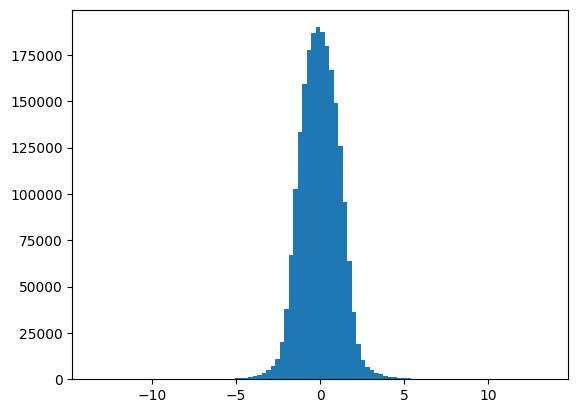

In [36]:
X = average_concept_epochs[:, :30, :]
plt.hist(X.flatten(), bins=100)
plt.show()

In [37]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
index = epochs.times == 0.170
X = average_concept_epochs[:, index, :].squeeze()
X += 5
# remove data from X less than 0 without changing the shape
X = np.maximum(X, 0)
# X = X[X > 0]
# X.shape
# plt.hist(X, bins=50)         
# plt.show()
# X.shape

/home/asuryawanshi/miniforge3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Categories which are best on component 0 are: [1158  784 1124 1762 1537 1845 1853  683  485 1227  728 1660  471  797
  769  344  424 1462 1155  569]
Categories which are best on component 1 are: [1251  263 1300 1378  276 1762 1136 1404 1242  816 1427 1449  577 1139
  505  710 1623  714  237  411]
Categories which are best on component 2 are: [ 978 1742  712  743   42 1425  474  302  588  912 1538 1440  756 1375
  960  222 1132  574 1130  406]
Component 0 is best loaded by the following image categories:


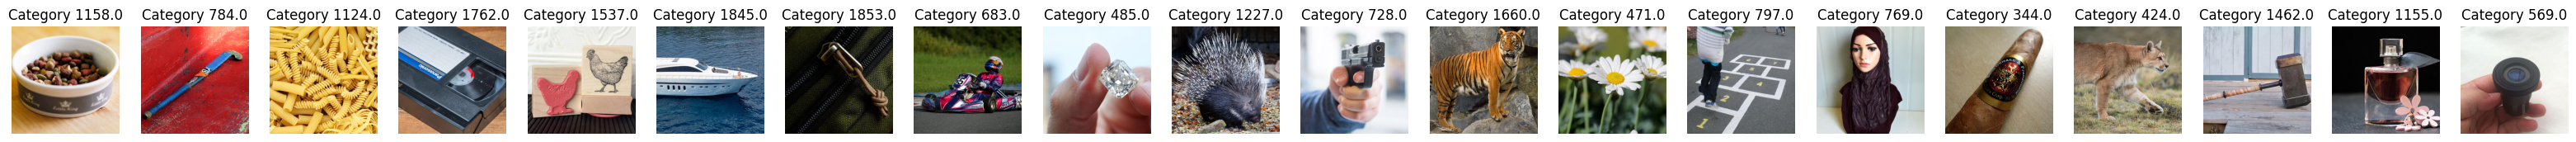

Component 1 is best loaded by the following image categories:


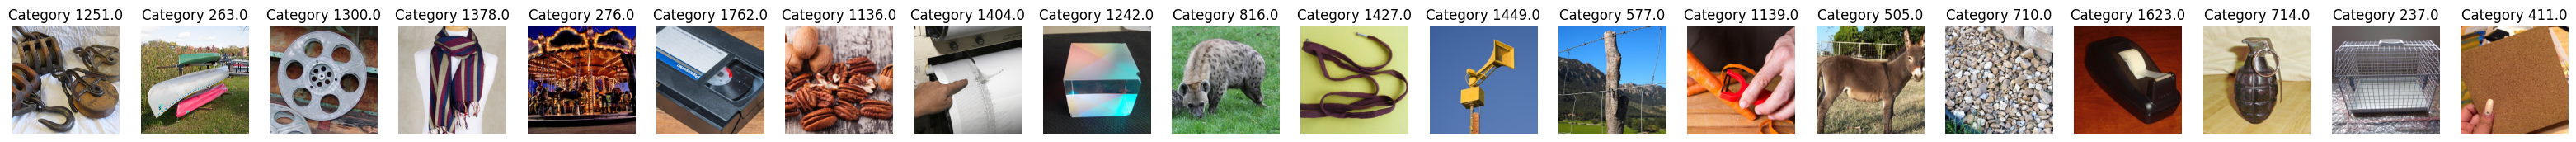

Component 2 is best loaded by the following image categories:


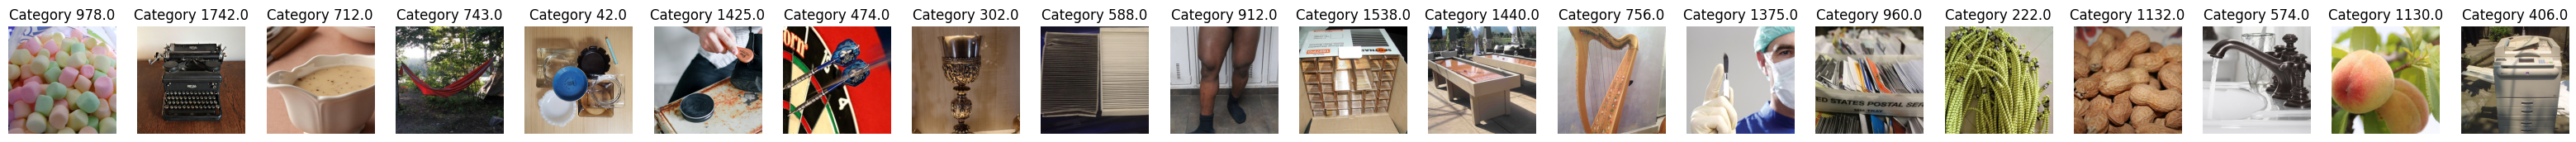

In [38]:

nmf_components = 3 # 3 mins for 30 components
model = NMF(n_components=nmf_components, random_state=40)
model.init = 'random'   
W = model.fit_transform(X)
H = model.components_
X_pred = np.dot(W, H)   
W.shape, H.shape, X_pred.shape  
nmf_components_vs_category = np.zeros((nmf_components, 20))
for i in range(nmf_components):
    sorted_indices = np.argsort(W[:,i])
    print(f'Categories which are best on component {i} are: {sorted_indices[-20:]}')
    nmf_components_vs_category[i,:] = sorted_indices[-20:]
# plot images for the top 5 categories for each component   
for component in range(nmf_components):
    if component > 20:
        break
    print(f"Component {component} is best loaded by the following image categories:")
    fig, axs = plt.subplots(1, 20, figsize=(40, 40))
    for i in range(20):
        category_nr = nmf_components_vs_category[component, i] 
        # Get the image paths for the given category_nr
        image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
        image_path = image_paths.iloc[0]
        image_path = f'{image_dir}{image_path}'
        img = mpimg.imread(image_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Category {category_nr}")
        axs[i].axis('off')
    plt.show()

In [39]:
# similarity matrix instead of reconstructing data matrix 

In [40]:
# correlation of dimensions with the categories

In [41]:
times = [-0.1,0.0, 0.170, 0.320, 0.5, 0.75, 1, 1.2]
nmf_components = 4 # 3 mins for 30 components

for time in times:
    index = epochs.times == time
    X = average_concept_epochs[:, index, :].squeeze()
    X += abs(X.min())
    model = NMF(n_components=nmf_components)
    W = model.fit_transform(X)
    H = model.components_
    X_pred = np.dot(W, H)   
    nmf_components_vs_category = np.zeros((nmf_components, 10))
    print(f'For time {time*1000} ms')
    for i in range(nmf_components):
        sorted_indices = np.argsort(W[:,i])
        # print(f'Categories which are best on component {i} are: {sorted_indices[-10:]}')
        nmf_components_vs_category[i,:] = sorted_indices[-10:]
    # plot images for the top 5 categories for each component   
    for component in range(nmf_components):
        if component > 20:
            break
        print(f"Component {component} is best loaded by the following image categories:")
        # fig, axs = plt.subplots(1, 10, figsize=(20, 20))
        for i in range(10):
            category_nr = nmf_components_vs_category[component, i] 
            # Get the image paths for the given category_nr
            image_paths = epochs.metadata[(epochs.metadata['category_nr'] == category_nr) & (epochs.metadata['trial_type'] == 'exp')]['image_path']
            print(image_paths)
            # print(image_paths.iloc[0])
            # image_path = image_paths.iloc[0]
            # image_path = f'../{image_path}'
            # img = mpimg.imread(image_path)
            # axs[i].imshow(img)
            # axs[i].set_title(f"Category {category_nr}")
            # axs[i].axis('off')
        # plt.show()

For time -100.0 ms
Component 0 is best loaded by the following image categories:
247      images_meg/camera2/camera2_06s.jpg
3723     images_meg/camera2/camera2_10s.jpg
5985     images_meg/camera2/camera2_03s.jpg
7959     images_meg/camera2/camera2_04s.jpg
9908     images_meg/camera2/camera2_01b.jpg
13261    images_meg/camera2/camera2_11s.jpg
15408    images_meg/camera2/camera2_07s.jpg
16633    images_meg/camera2/camera2_09s.jpg
18330    images_meg/camera2/camera2_05s.jpg
20401    images_meg/camera2/camera2_02s.jpg
23629    images_meg/camera2/camera2_12s.jpg
24929    images_meg/camera2/camera2_08s.jpg
Name: image_path, dtype: object
105      images_meg/face_mask/face_mask_06s.jpg
3576     images_meg/face_mask/face_mask_10s.jpg
6291     images_meg/face_mask/face_mask_03s.jpg
7955     images_meg/face_mask/face_mask_04s.jpg
9655     images_meg/face_mask/face_mask_01b.jpg
11746    images_meg/face_mask/face_mask_11s.jpg
14509    images_meg/face_mask/face_mask_07s.jpg
16401    images_meg/fac

2000     images_meg/propeller/propeller_06s.jpg
2879     images_meg/propeller/propeller_10s.jpg
5022     images_meg/propeller/propeller_03s.jpg
7668     images_meg/propeller/propeller_04s.jpg
9969     images_meg/propeller/propeller_01s.jpg
12488    images_meg/propeller/propeller_11s.jpg
14347    images_meg/propeller/propeller_07s.jpg
16208    images_meg/propeller/propeller_09s.jpg
20148    images_meg/propeller/propeller_05s.jpg
22320    images_meg/propeller/propeller_02s.jpg
23850    images_meg/propeller/propeller_12s.jpg
25870    images_meg/propeller/propeller_08s.jpg
Name: image_path, dtype: object
1472     images_meg/card/card_06s.jpg
3643     images_meg/card/card_10s.jpg
4654     images_meg/card/card_03s.jpg
8788     images_meg/card/card_04s.jpg
10840    images_meg/card/card_01b.jpg
12577    images_meg/card/card_11s.jpg
14183    images_meg/card/card_07s.jpg
17234    images_meg/card/card_09s.jpg
19892    images_meg/card/card_05s.jpg
21732    images_meg/card/card_02s.jpg
24645    ima